<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Research Questions :- 
<ul>
<li><a href="#q1">1- What is the percentage of films type ?</a></li>
<li><a href="#q2">2- did high vote_count and vote_average  means high revenue </a></li>
<li><a href="#q3">3- did movies whth high runtime costs more than less reuntime</a></li>
<li><a href="#q4">4- what is the movies that gaind highst revenue</a></li>
<li><a href="#q5">5- How many movies per year</a></li>
</ul>

In [41]:
# import the important Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

<a id='wrangling'></a>
## Data Wrangling
<ul>
<li><a href="#load">Load Data</a></li>
<li><a href="#assess">Assess data</a></li>
<li><a href="#clean">Clean data</a></li>
<li><a href="#reshape">Reshape data</a></li>
</ul>

### 1- Load Data

In [43]:
df_mov = pd.read_csv('./dataset/tmdb-movies.csv')
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='assess'></a>
### 2- Assess
- number of rows >> 10866
- number of columns >> 21
- number of duplicated >> 1
- number of missing values per column :- 
    - imdb_id >> 10
    - cast >> 76
    - homepage >> 7930
    - director >> 44
    - tagline >> 2824
    - keywords >>  1493
    - overview >>  4
    - runtime >> 0
    - genres >> 23
    - production_companies >> 1030
- Columns Dtypes need to change :- 
    - Release_date >> From object to datetime
- Columns to drop
    - home_page
- Values will transform to NaN
    - 0

In [40]:
## shape of data 
df_mov.shape

(23867, 20)

In [4]:
## information about dataset
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
## summary statistics
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
## Check for duplicated records
df_mov.duplicated().sum()

1

In [7]:
## Check for missing values per column
df_mov.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

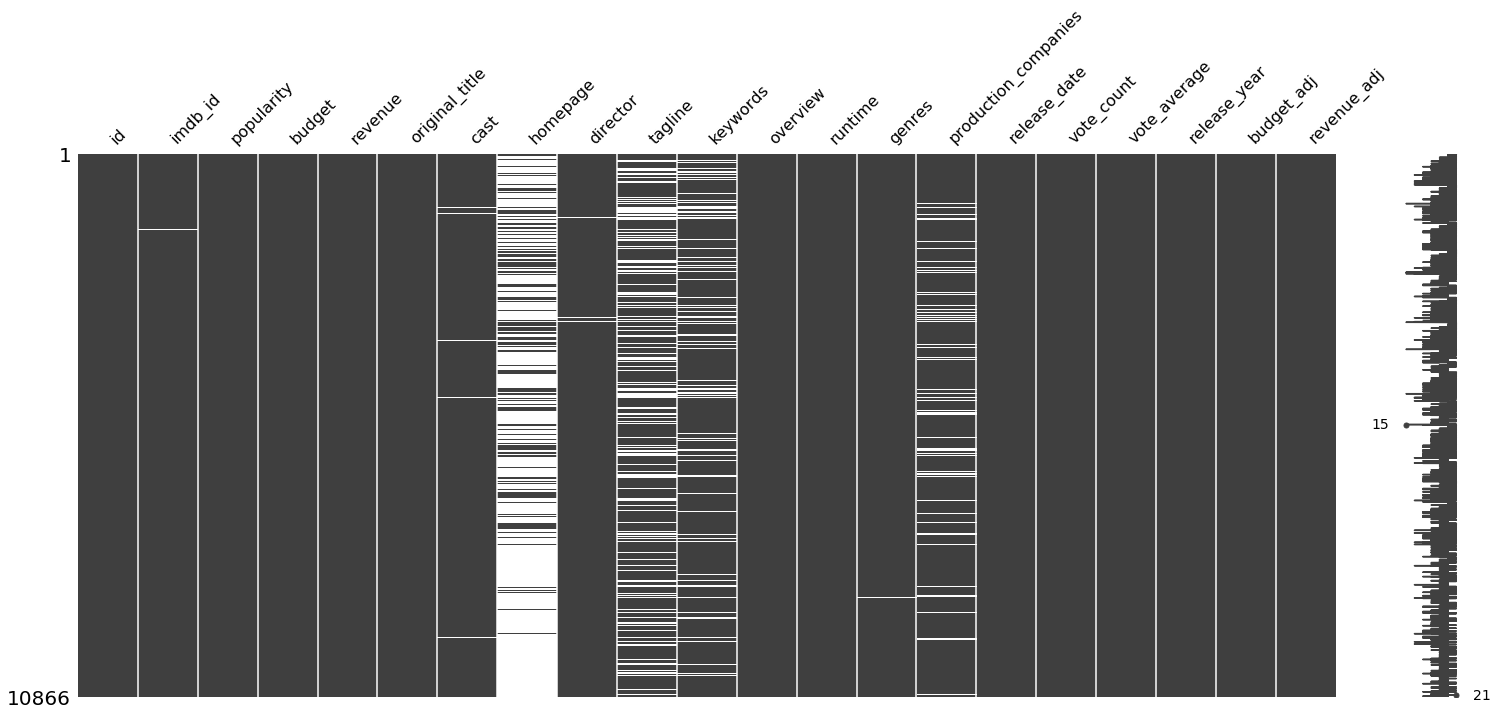

In [8]:
## Check type of missingness 
msno.matrix(df_mov)

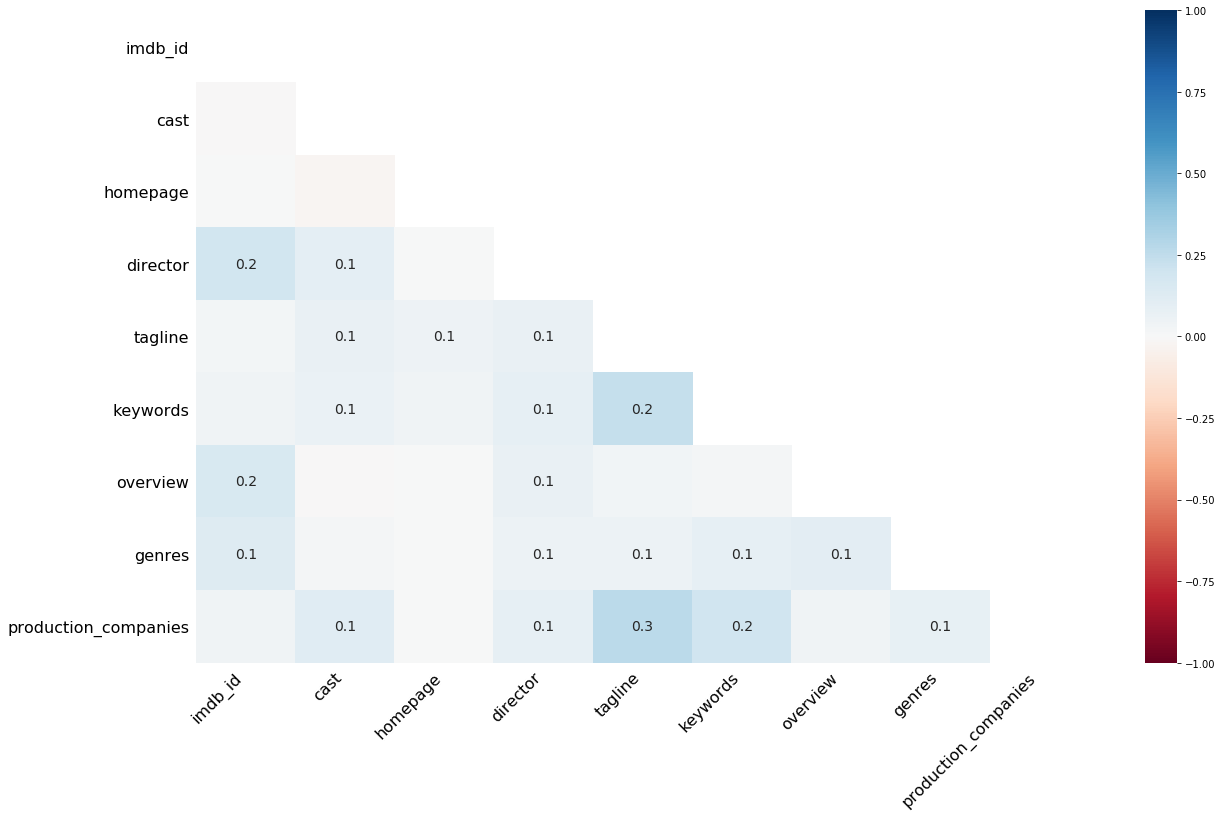

In [9]:
## Correlation between missing values per columns
msno.heatmap(df_mov)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5f4b01d50>,
      dtype=object)

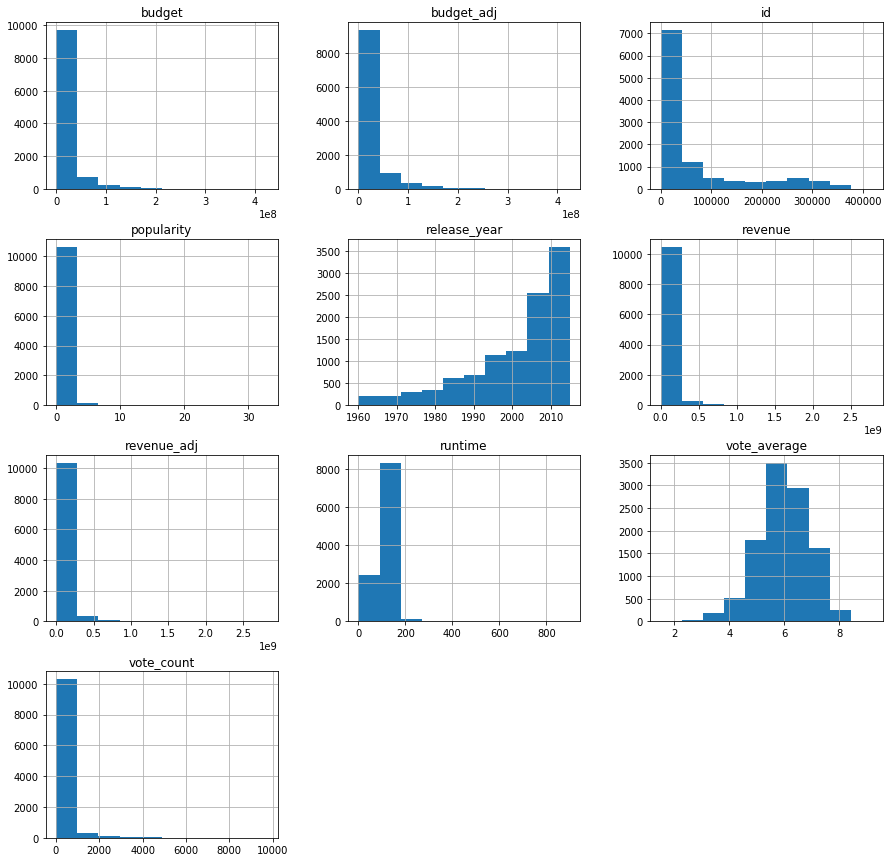

In [10]:
df_mov.hist(figsize= (15,15))



<a id='clean'></a>

### 3- Data Cleaning
> There is some issues in the Data :- 
- drop Extraneous columns from data
- Treat data types
- Assign 0 to NaN
- Treat Duplicates
- Treat nullity

In [11]:
# Drop home_page columns
df_mov.drop(['homepage'], axis=1, inplace=True)
df_mov.shape[1]

20

In [12]:
## change type of releas_data from string to datetime
df_mov['release_date'] = pd.to_datetime(df_mov['release_date'])

In [13]:
## Change 0 values to NaN in these columns ['budget','revenue', 'budget_adj', 'revenue_adj']

def n_0(l):
    df_mov[l] = df_mov[l].replace(['0',0], np.nan)

n_0(['budget','revenue','budget_adj', 'revenue_adj'])

df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10866.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.070863,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,31.381405,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,111.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
## Check And drop duplicates
df_mov.drop_duplicates(inplace=True)
df_mov.drop_duplicates(subset=['original_title'], inplace=True)
df_mov.duplicated().sum()

0

In [15]:
df_mov.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [16]:
## Drop some columns have little missing values
df_mov.dropna(subset=[ 'cast', 'director','genres','overview','production_companies','imdb_id'],inplace=True)

In [17]:
## impute nan by mean in 'runtime'
df_mov['runtime'].fillna(df_mov['runtime'].mean(), inplace=True)

In [18]:
## impute nan values in budget and revenue using linear interpolate
df_mov['budget'].interpolate(method ='linear', limit_direction ='forward',inplace=True)
df_mov['revenue'].interpolate(method ='linear', limit_direction ='forward',inplace=True)

In [19]:
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9488.000000,9488.000000,9.488000e+03,9.488000e+03,9488.000000,9488.000000,9488.000000,9488.000000,4.882000e+03,4.628000e+03
mean,64221.913997,0.697357,2.407508e+07,6.395352e+07,102.698567,241.411256,5.956598,2001.217011,3.795480e+07,1.167532e+08
std,91495.599380,1.045416,3.270907e+07,1.377284e+08,26.483380,607.914152,0.915891,12.818442,4.240537e+07,2.000793e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10293.500000,0.232403,5.000000e+06,4.997287e+06,90.000000,18.000000,5.400000,1994.000000,8.952329e+06,1.148637e+07
50%,18951.000000,0.420687,1.271131e+07,1.899319e+07,100.000000,46.000000,6.000000,2005.000000,2.378689e+07,4.524772e+07
75%,72249.250000,0.778638,3.000000e+07,6.008987e+07,112.000000,176.000000,6.600000,2011.000000,5.122023e+07,1.343623e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [20]:
df_mov.isna().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
tagline                 2091
keywords                1084
overview                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4606
revenue_adj             4860
dtype: int64

In [21]:
df_mov.shape

(9488, 20)

In [22]:
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


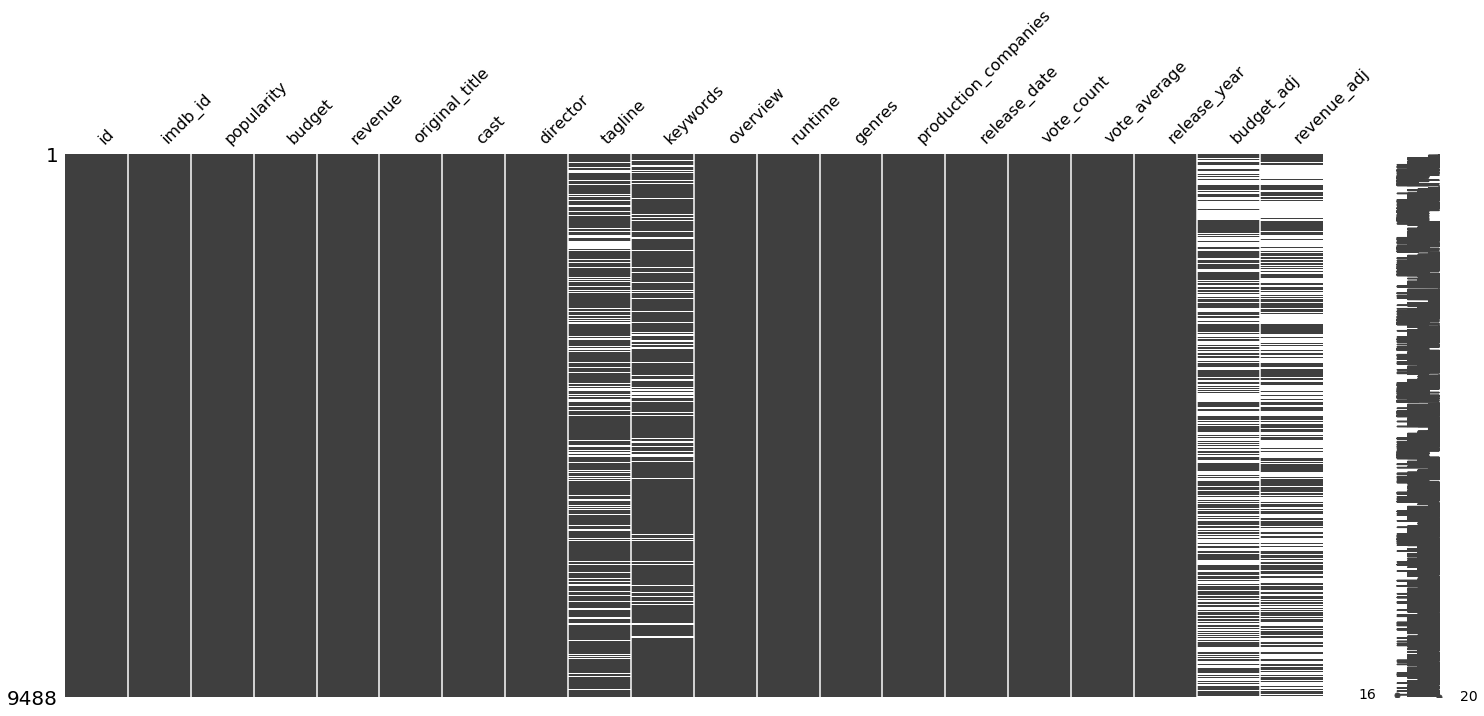

In [23]:
msno.matrix(df_mov)
plt.show()

<a id='reshape'></a>
### 4- Reshaping Data

#### - Splitting the genres so we can find unique genre.

In [24]:
from pandas import Series,DataFrame

In [25]:
genr = df_mov['genres'].str.split('|').apply(Series, 1).stack()
genr.index = genr.index.droplevel(-1)
genr.name = 'genres'

In [26]:
del df_mov['genres']

In [27]:
df_mov = df_mov.join(genr)

In [28]:
df_mov.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#q1">1- What is the percentage of films type ?</a></li>
<li><a href="#q2">2- did high vote_count and vote_average  means high revenue </a></li>
<li><a href="#q3">3- did movies whth high runtime costs more than less reuntime</a></li>
<li><a href="#q4">4- what is the movies that gaind highst revenue</a></li>
<li><a href="#q5">5- How many movies per year</a></li>
</ul>

<a id=q1></a>
### Research Question 1 (What is the percentage of films type ?)

In [29]:
gen = df_mov.groupby('genres')['original_title'].count()
gen

genres
Action             2165
Adventure          1339
Animation           606
Comedy             3373
Crime              1257
Documentary         311
Drama              4235
Family             1059
Fantasy             808
Foreign             117
History             299
Horror             1448
Music               329
Mystery             729
Romance            1522
Science Fiction    1094
TV Movie            127
Thriller           2639
War                 252
Western             158
Name: original_title, dtype: int64

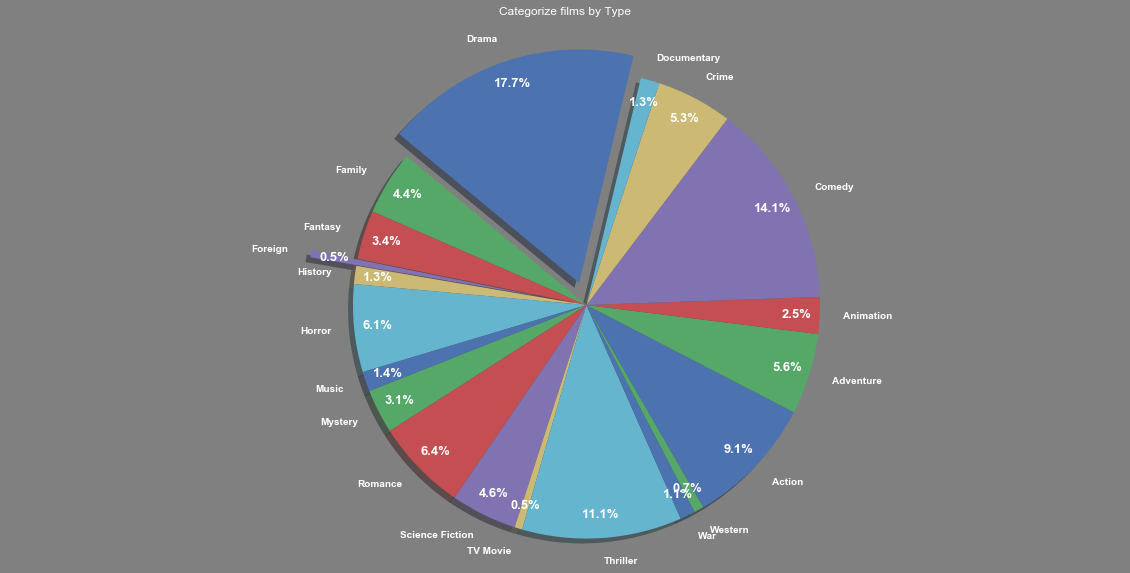

In [30]:

plt.style.use('seaborn')
plt.rcParams['text.color'] = 'w'
plt.rcParams['font.weight'] = 700
plt.rcParams['font.size'] = 13.0
fig, ax = plt.subplots(figsize=(20,10))
explode = (0, 0, 0, 0,0,0,0.1,0,0,0.2,0,0,0,0,0,0,0,0,0,0) 
ax.pie(gen, labels=gen.index, shadow=True,autopct='%1.1f%%', startangle=-60, explode=explode, pctdistance=0.90)
ax.axis('equal')
fig.set_facecolor('grey')
ax.set_title('Categorize films by Type')
plt.show()

#### The most type is Drama : 17.7% and less type is Foreign : 0.5%

<a id='q2'></a>
### Research Question 2  (did high vote_count and vote_average  means high revenue ?)

In [31]:
## Group revenue and vote counts by vote average 
v_r = df_mov.groupby('vote_average',  as_index = False).agg({'revenue' : 'mean','vote_count':'mean'})

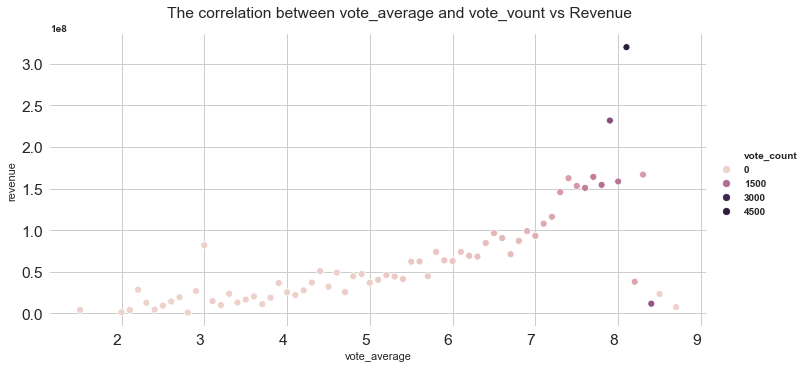

In [46]:
## Visualize Relationship between revenue and vote count, vote average
sns.set_style("whitegrid")

g=sns.relplot(kind='scatter', data=v_r, 
            x='vote_average', y='revenue', 
            hue='vote_count', 
            height=5, 
            aspect=2)

plt.xticks(horizontalalignment='right', fontweight='light', fontsize='large')
plt.yticks(horizontalalignment='right', fontweight='light', fontsize='large')
g.fig.suptitle('The correlation between vote_average and vote_vount vs Revenue',y=1.01)
plt.show()

#### There is Positive correleation between High vote and Revenue that means the revenue increased by high vote

<a id='q3'></a>
### Research Question 3  ( does movies with high runtime costs more than less reuntime)

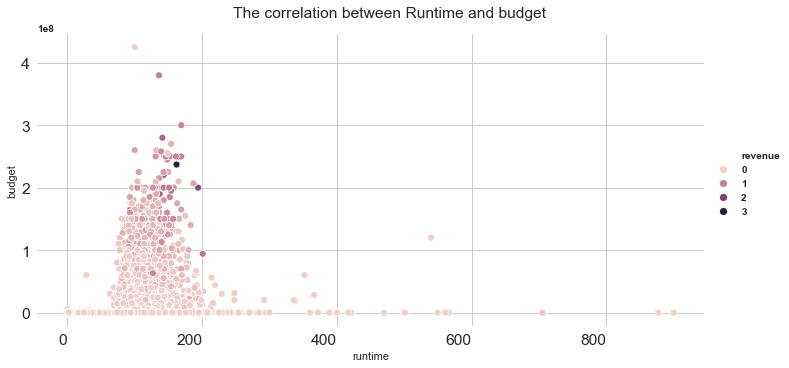

In [47]:
g=sns.relplot(kind='scatter', data=df_mov, x='runtime', y='budget', hue='revenue'
            ,height=5, 
            aspect=2)
plt.xticks(horizontalalignment='right', fontweight='light', fontsize='large')
plt.yticks(horizontalalignment='right', fontweight='light', fontsize='large')
g.fig.suptitle('The correlation between Runtime and budget',y=1.01)

plt.show()

### The runtime not means high cost, there are movies with less runtime but high cost

<a id='q4'></a>
### Research Question 4  (what is the movies that gaind highst revenue)

In [34]:
hi_rev = df_mov[df_mov['revenue'] == df_mov['revenue'].max()]

In [35]:
print(f"The movie which gained highst revenues is : {hi_rev.original_title.unique()}")

The movie which gained highst revenues is : ['Avatar']


<a id='q5'></a>
### Research Question 5  (How many movies per year)

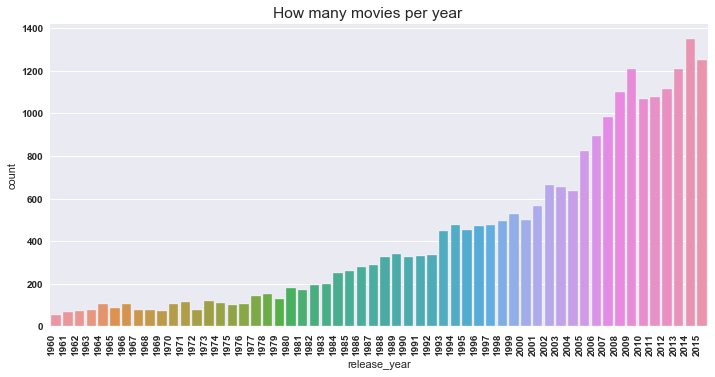

In [36]:
sns.set_style('darkgrid')

g = sns.catplot(kind='count', data=df_mov, x='release_year', height=5, aspect=2)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='bold',
)

g.fig.suptitle('How many movies per year',y=1.01)

plt.show()

### The most year in which films were produced was 2014

In [37]:
df_mov.groupby('release_year', as_index=False).agg({'original_title':'count'}).sort_values(
    'original_title', ascending=False)

,release_year,original_title
54,2014,1351
55,2015,1252
53,2013,1208
49,2009,1208
52,2012,1117
48,2008,1101
51,2011,1079
50,2010,1066
47,2007,983
46,2006,896


### The most year in which films were produced was 2014 with 1351 movie

<a id='q6'></a>
### Research Question 5  (what is the type of movie which gained Heigh revenues)

In [38]:
type_rev = df_mov.groupby('genres', as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending=False)
type_rev

,genres,revenue
6,Drama,2.105890e+11
3,Comedy,2.078279e+11
0,Action,2.065115e+11
1,Adventure,1.849057e+11
17,Thriller,1.542705e+11
7,Family,1.144703e+11
15,Science Fiction,1.090133e+11
8,Fantasy,1.019086e+11
14,Romance,8.688295e+10
4,Crime,7.411879e+10


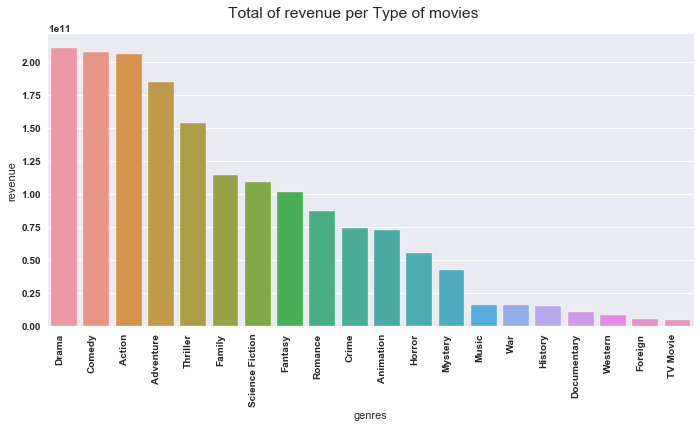

In [39]:

sns.set_style('darkgrid')

g = sns.catplot(kind='bar', data=type_rev, x='genres', y='revenue', height=5, aspect=2)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='bold',
)

g.fig.suptitle('Total of revenue per Type of movies',y=1.01)

plt.show()

### Drama movies make the highest profit

<a id='conclusions'></a>
## Conclusions

- The aim of this analysis is to extract information from movie-related data over the past years, and to answer questions that were included in the introduction.

- After studying the data, cleaning it, processing it and preparing it for analysis, it reached some information, the most important of which were the following:

    - The most type of movies is Drama: 17.7% and less type is Foreign: 0.5%.
    - There is Positive correleation between High vote and Revenue that means the revenue increased by high vote.
    - The runtime not means high cost, there are movies with less runtime but high cost.
    - The most year in which films were produced was 2014.
    - Drama movies make the highest profit.
    
- The size of the data was appropriate for the analysis, but there were many challenges in cleaning and processing the data